### MTH9831_Homework11_Group1
Boyu Yang, Julius Gruber, Yicheng Sun, Ziyuan Li

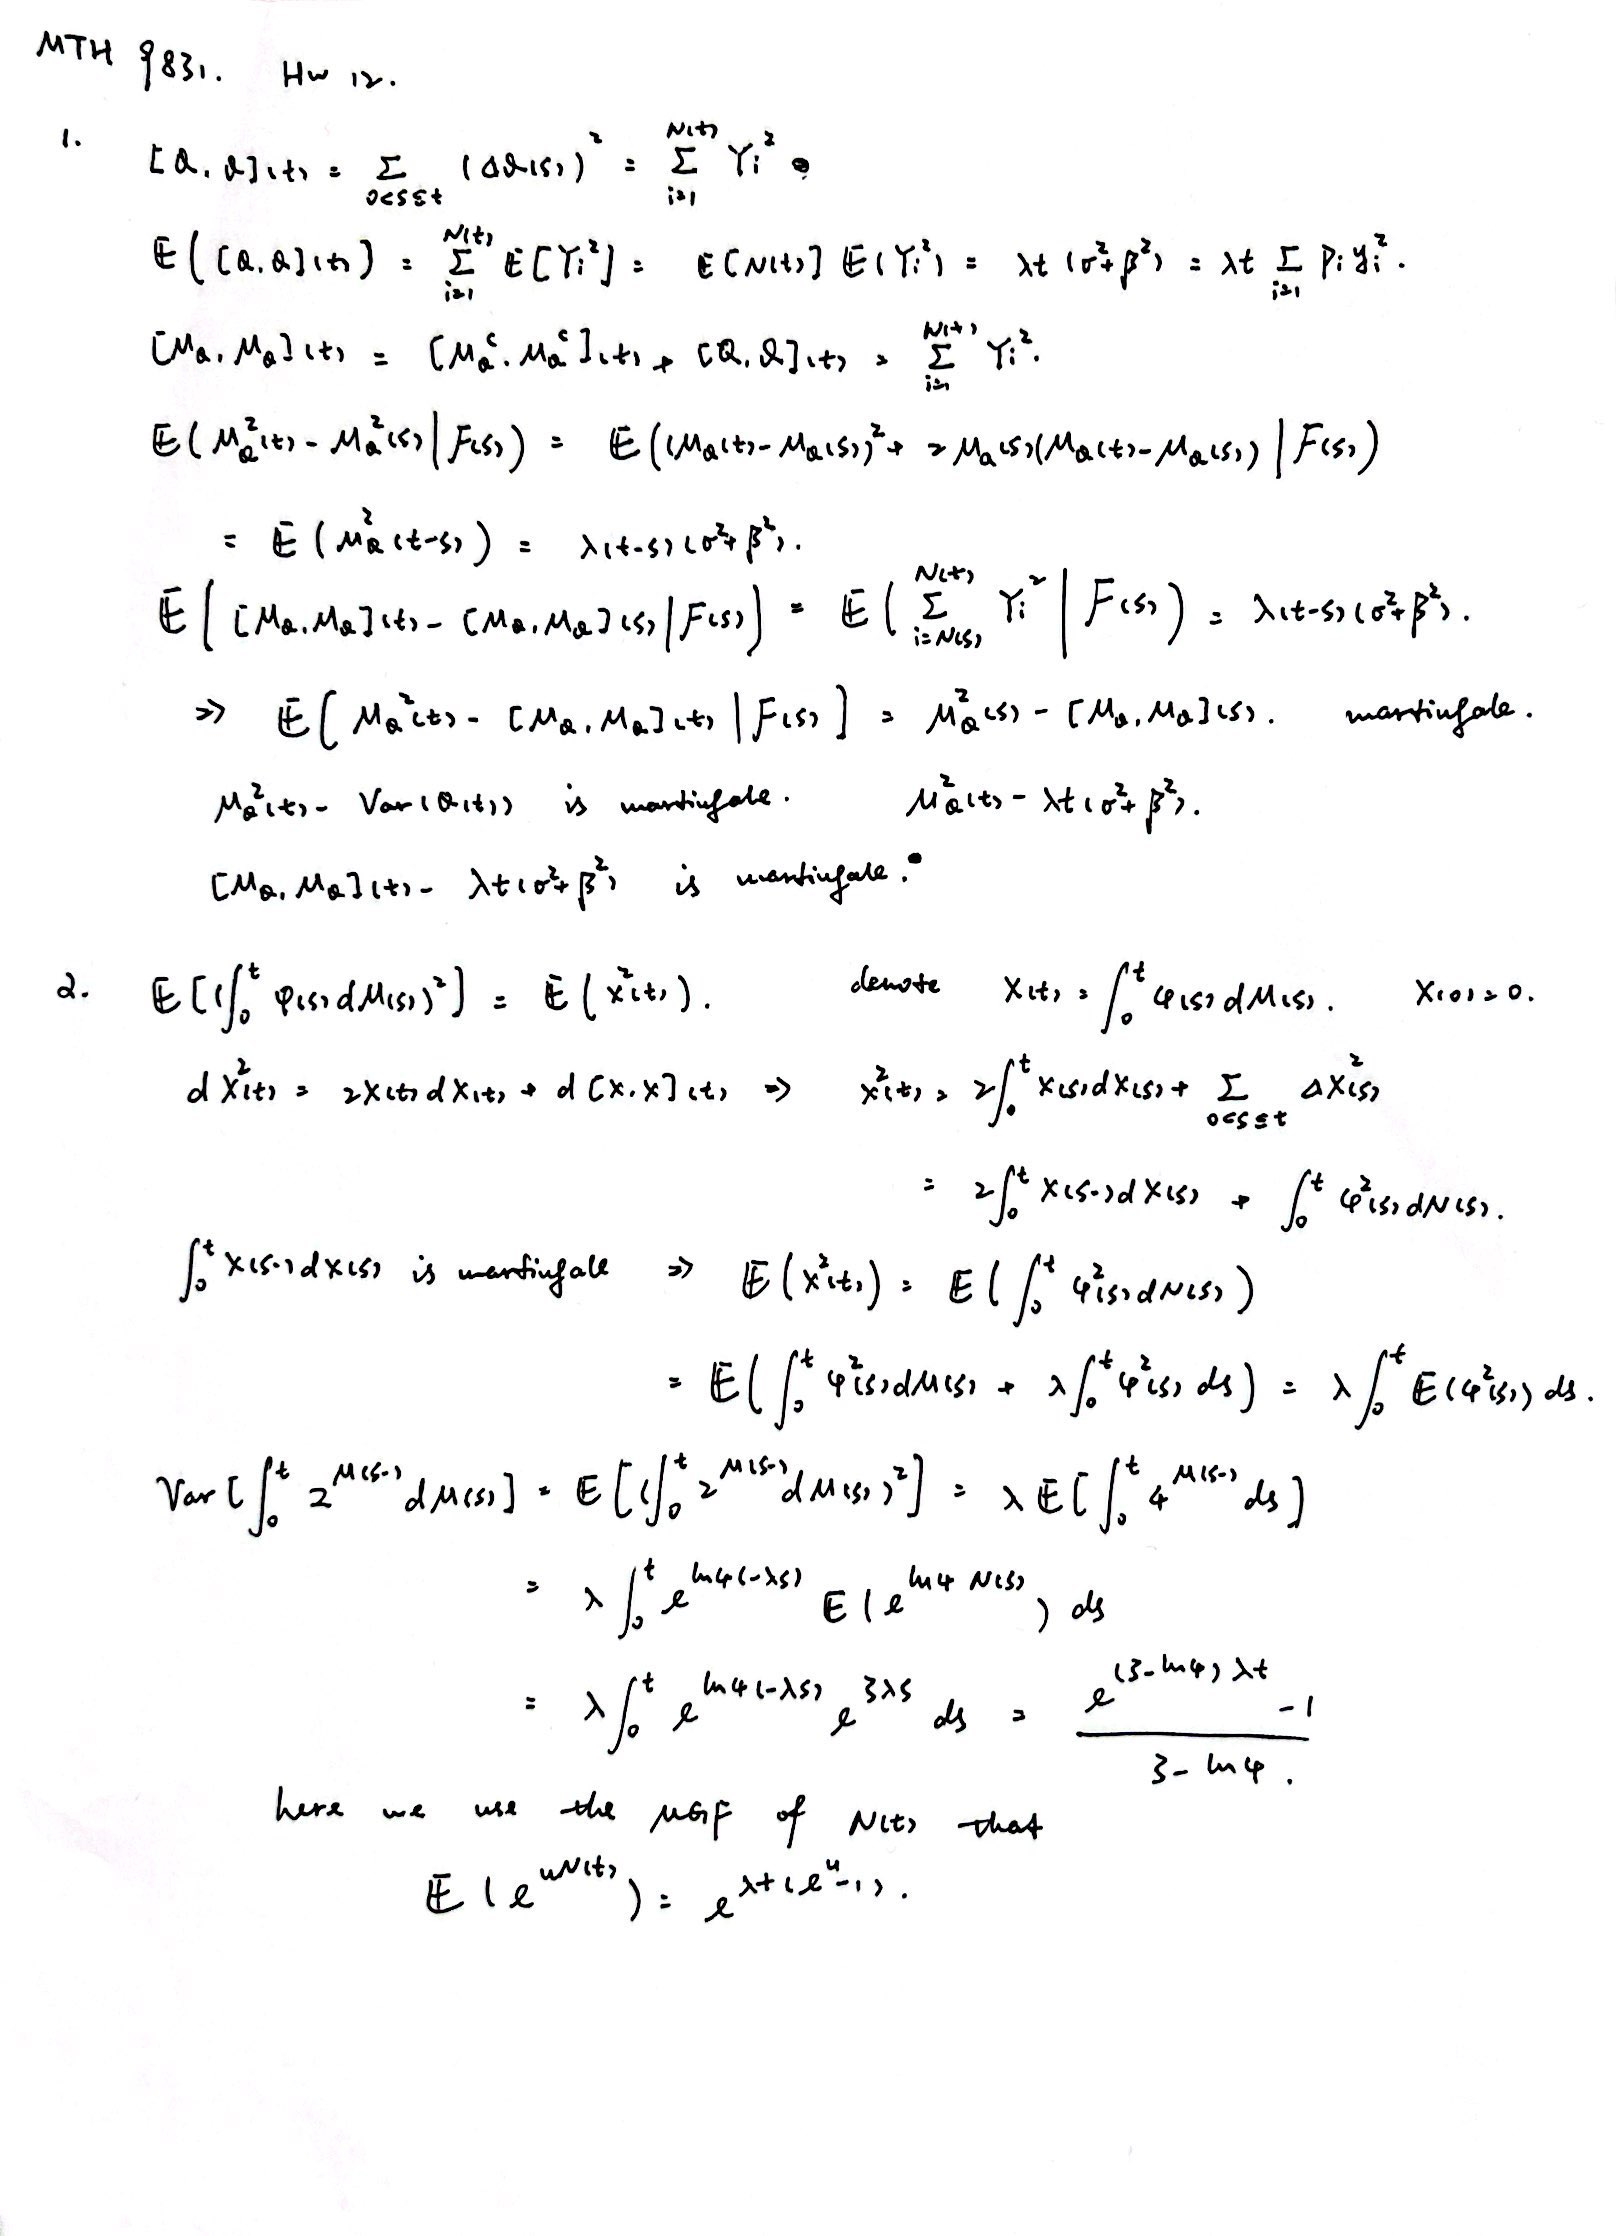

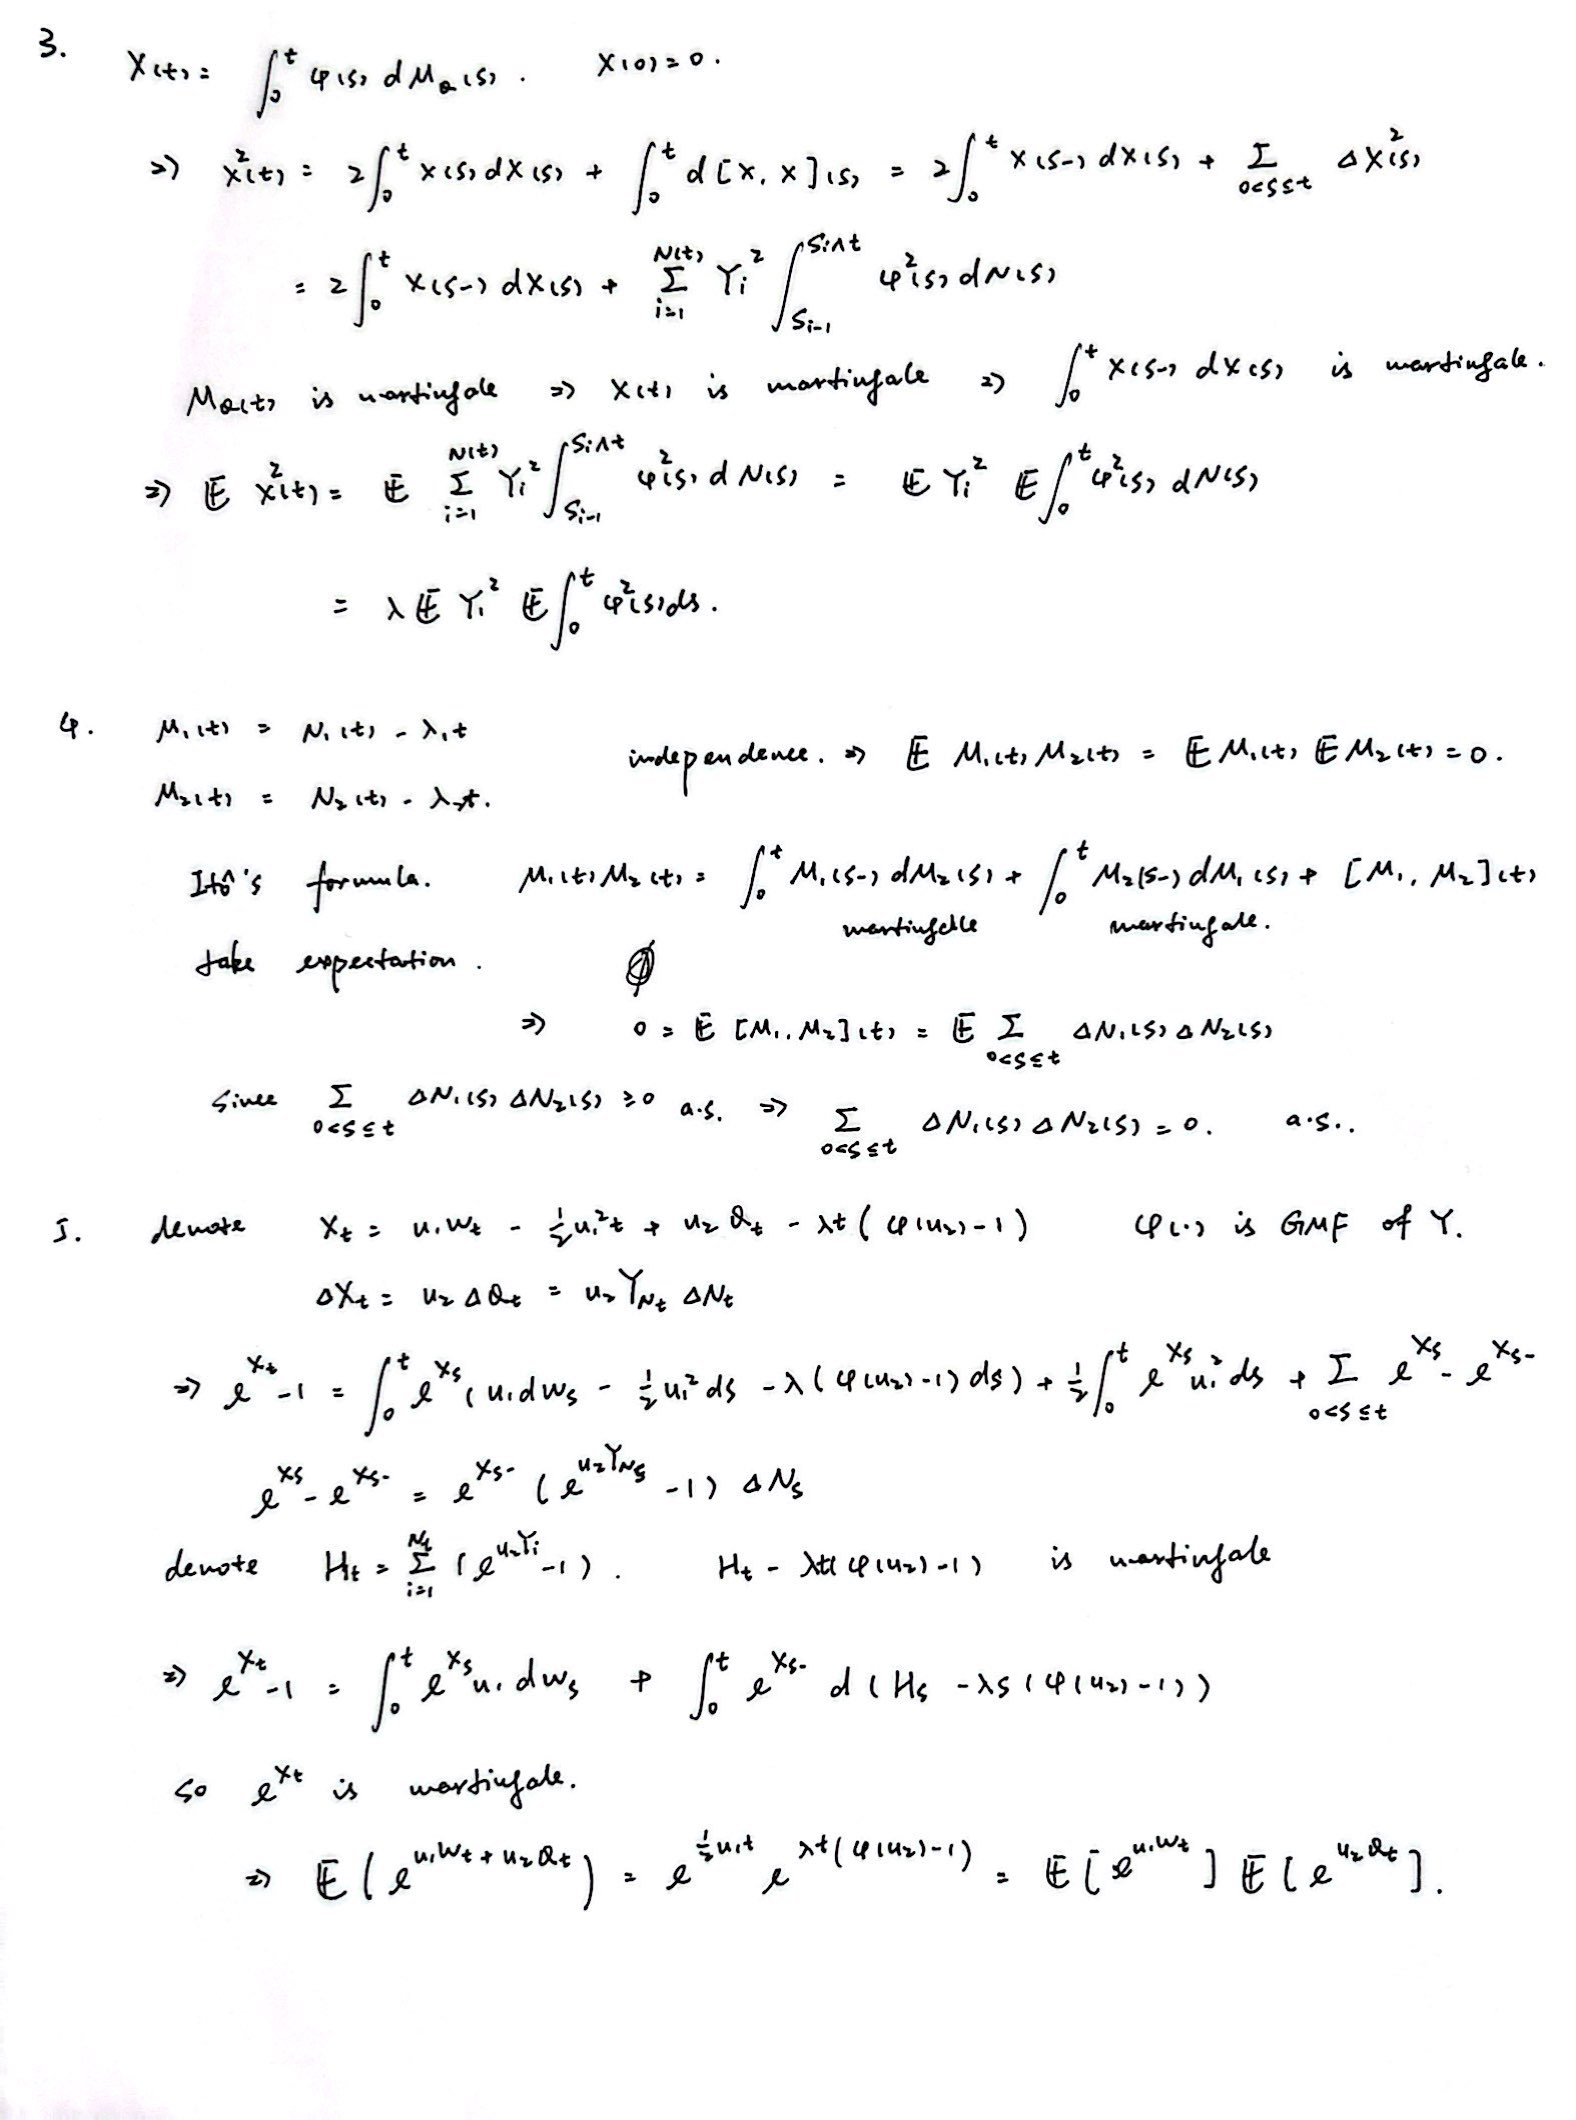

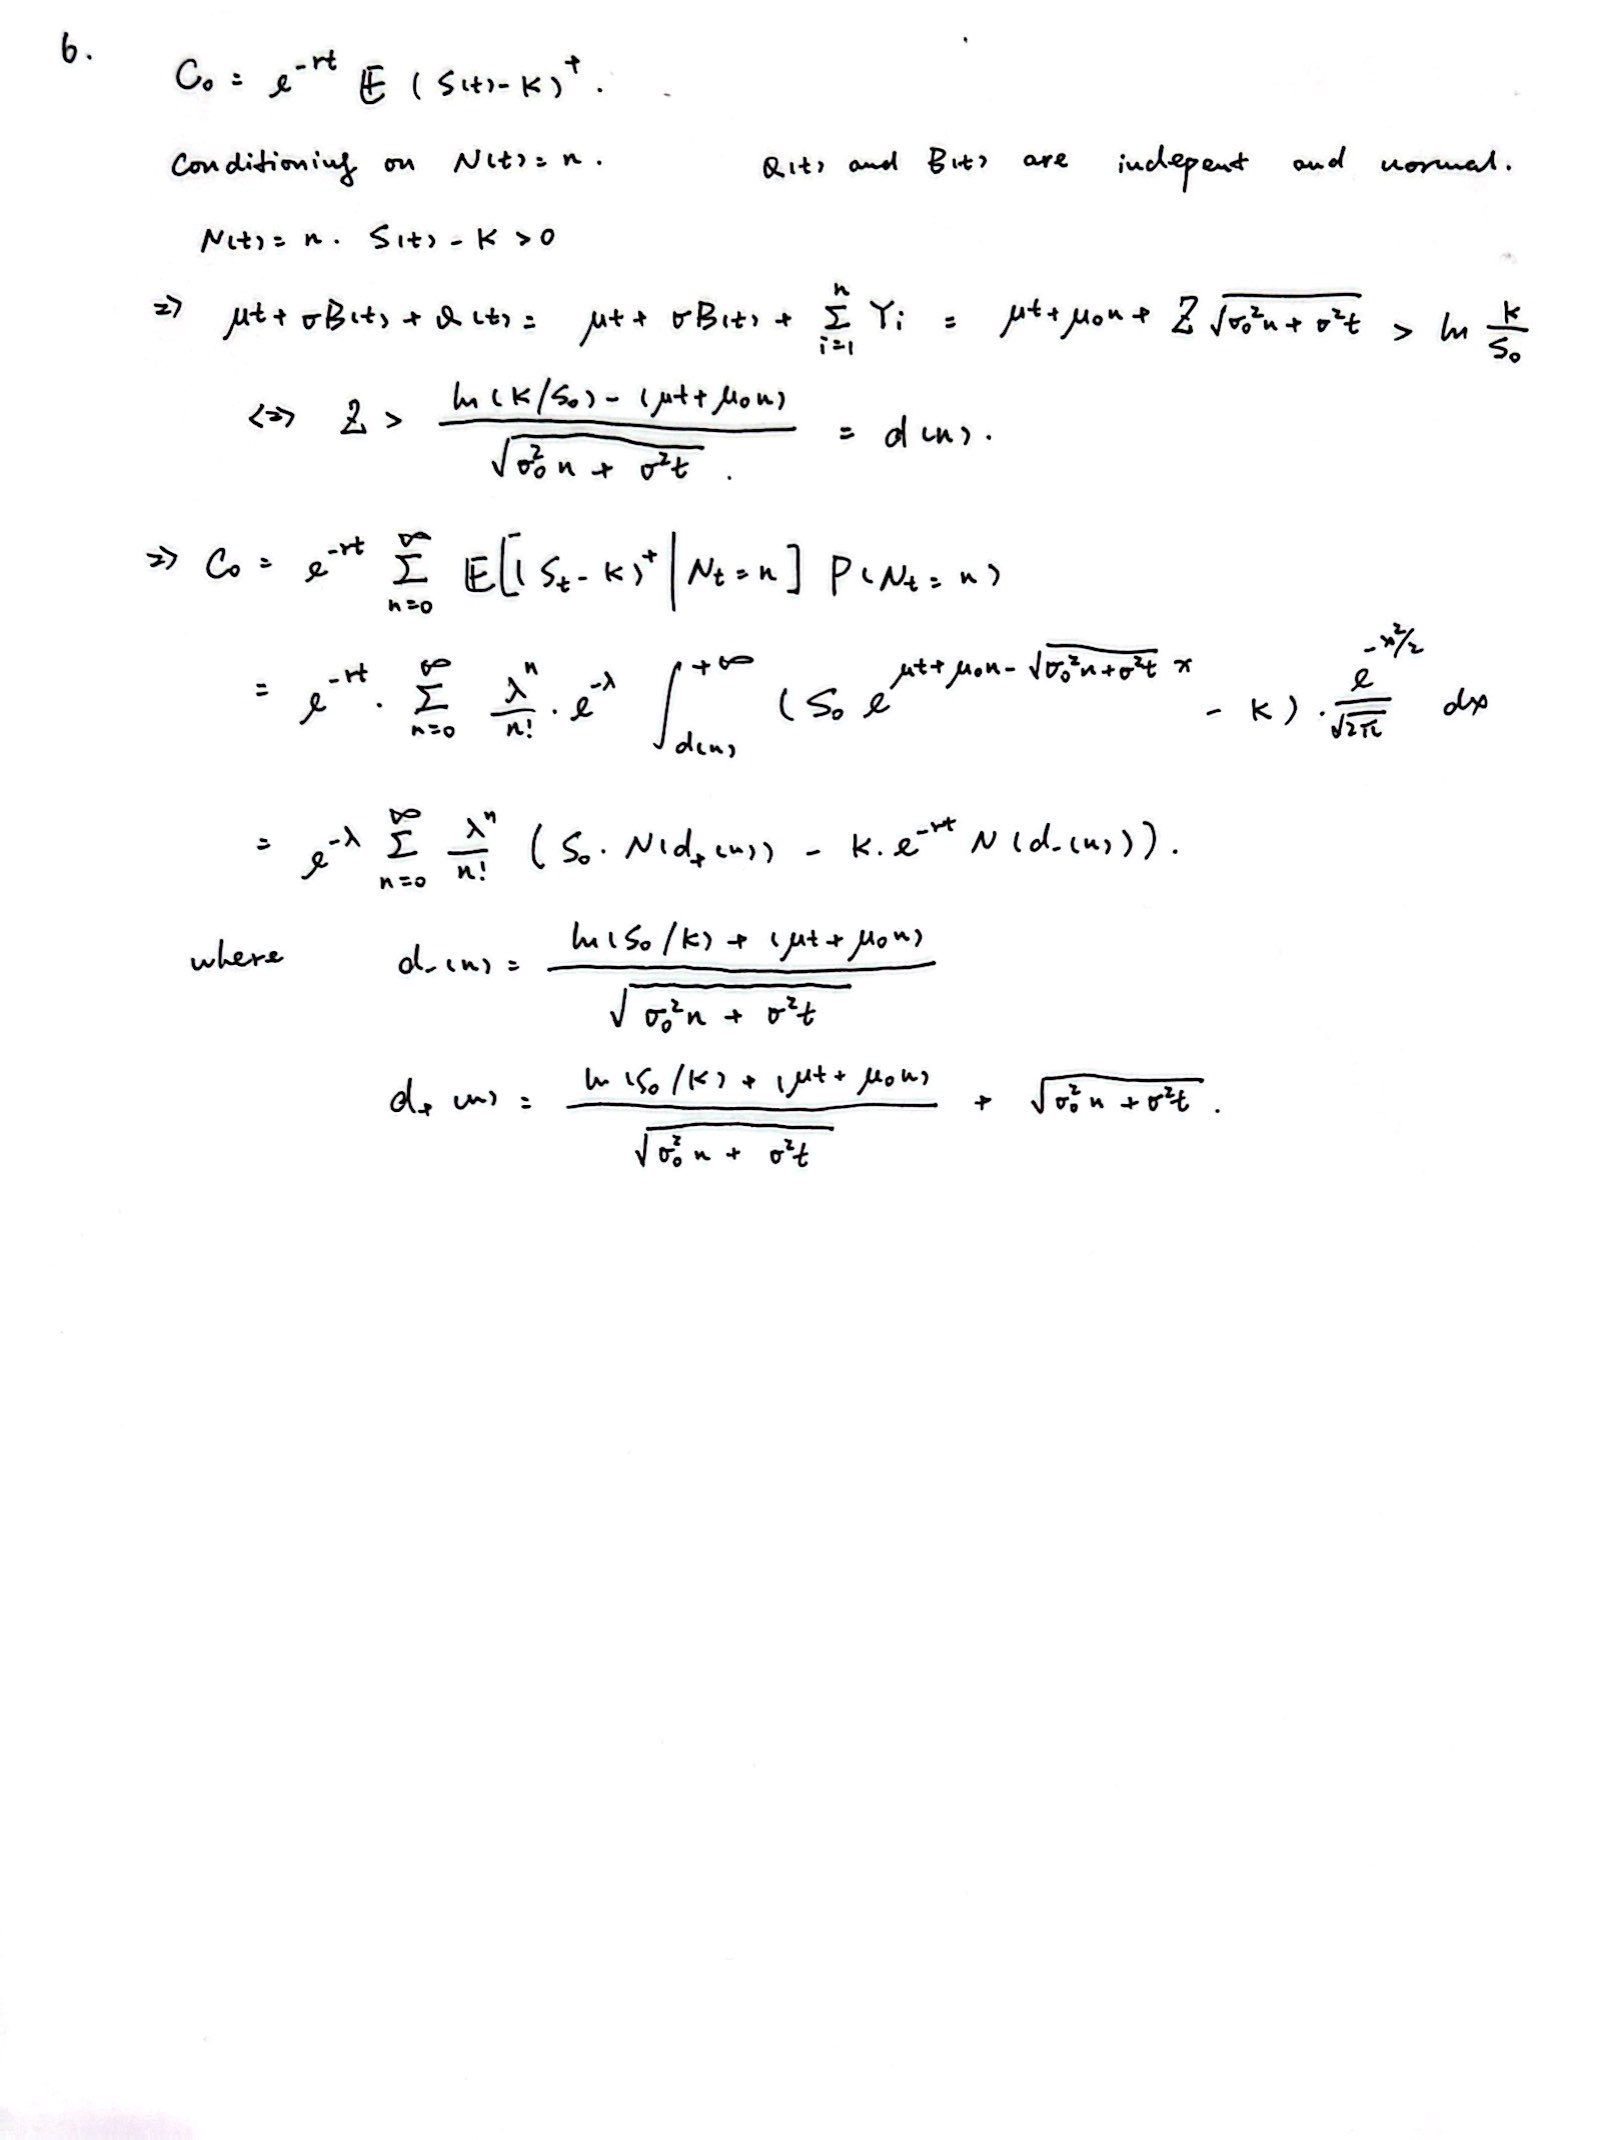

### Question 7

In [18]:
import numpy as np
np.random.seed(42)
# Parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
T = 1         # Time to maturity (in years)
r = 0.045     # Risk-free interest rate
sigma = 0.1   # Volatility of the stock
lambda_ = 20  # Intensity of the Poisson process
mu_0 = 0.003  # Mean of the jump size
sigma_0 = 0.014 # Standard deviation of the jump size
n_simulations = 100000 # Number of Monte Carlo simulations

# Monte Carlo simulation function
def monte_carlo_option_pricing(S0, K, T, r, sigma, lambda_, mu_0, sigma_0, n_simulations):
    payoffs = []
    for _ in range(n_simulations):
        # Simulating the standard Brownian motion part
        Z_B = np.random.normal(0, np.sqrt(T))

        # Simulating the compound Poisson process part
        N = np.random.poisson(lambda_ * T)
        Q_T = np.sum(np.random.normal(mu_0, sigma_0, N)) if N > 0 else 0

        mu = (r - 0.5 * sigma**2) - lambda_ * (np.exp(mu_0 + 0.5 * sigma_0**2) - 1)

        # Stock price at time T
        S_T = S0 * np.exp(mu * T + sigma * Z_B + Q_T)

        # Call option payoff
        payoff = max(S_T - K, 0)
        payoffs.append(payoff)

    # Discounting payoffs to present value and calculating average
    discounted_payoffs = np.exp(-r * T) * np.array(payoffs)
    option_price = np.mean(discounted_payoffs)
    return option_price

# Run the Monte Carlo simulation
option_price = monte_carlo_option_pricing(S0, K, T, r, sigma, lambda_, mu_0, sigma_0, n_simulations)
print(f"Estimated European Call Option Price: {option_price}")


Estimated European Call Option Price: 7.147398190294685


In [17]:
from scipy.stats import norm, poisson
def theoretical_option_price(S0, K, T, r, sigma, lambda_, mu_0, sigma_0):
    res = 0
    for n in range(100000):
        mu = (r - 0.5 * sigma**2) - lambda_ * (np.exp(mu_0 + 0.5 * sigma_0**2) - 1)
        d2 = (np.log(S0 / K) + mu*T + mu_0*n) / np.sqrt(sigma_0**2*n+sigma**2*T)
        d1 = d2 + np.sqrt(sigma_0**2*n+sigma**2*T)
        res += poisson.pmf(n,lambda_*T)*(S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2))
    return res

# Run the theoretical option price function
option_price_theoretical = theoretical_option_price(S0, K, T, r, sigma, lambda_, mu_0, sigma_0)
print(f"Theoretical European Call Option Price: {option_price_theoretical}")

Theoretical European Call Option Price: 7.0999328534858455


We can see that the Monte Carlo simulation is very close to the theoretical value of the European call, which is around 7.1.